# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT DATA

In [2]:
df = pd.read_excel('/content/drive/MyDrive/data_customer_purchase.xlsx')

In [3]:
df.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,1
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,0
2,4141,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,0
3,6182,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,0
4,5324,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,0


In [4]:
df.tail()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
2235,10870,Graduation,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,0
2236,4001,PhD,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,0
2237,7270,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,1,2,3,13,0
2238,8235,Master,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,0
2239,9405,PhD,Married,52869.0,40,84,3,61,2,1,21,3,3,1,4,1


# EXPLORATORY DATA ANALYSIS (EDA)

## Checking Missing Value

In [5]:
def missing_values_reporter(df):
    na_count = df.isna().sum()
    ser = na_count[na_count > 0]
    ser_p = np.round(ser.divide(df.shape[0])*100,2)
    tmp = pd.DataFrame({"N missings": ser,"% missings": ser_p,"Above Threshold (3%)": False})
    tmp.loc[tmp["% missings"] > 3., 'Above Threshold (3%)'] = 'True'
    return tmp

In [6]:
missing_values_reporter(df)

,N missings,% missings,Above Threshold (3%)
Income,24,1.07,False


Seems Like the missing value of income variable consist 24 data or 1,07%. It means percentage is under threshold, So handling missing value with mean

## Handling Missing Value with Mean For Numeric

In [7]:
df = df.fillna(df.mean())
df

<ipython-input-7-f383654e7baf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,1
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,0
2,4141,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,0
3,6182,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,0
4,5324,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,0
2236,4001,PhD,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,0
2237,7270,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,1,2,3,13,0
2238,8235,Master,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,0


Then, check again about missing value. So, there isn't any missing value again in income variable

In [8]:
df.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Response               0
dtype: int64

## Kategori

In [9]:
df.describe(include=["object", "category"])

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


### Pengecekan Kategori "Aneh" atau "Tidak diinginkan" dalam data Kategori

In [10]:
def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:
        cat_list.append(df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        203  0.108374
               Basic            54  0.037037
               Graduation     1127  0.134871
               Master          370  0.154054
               PhD             486  0.207819
Marital_Status Absurd            2  0.500000
               Alone             3  0.333333
               Divorced        232  0.206897
               Married         864  0.113426
               Single          480  0.220833
               Together        580  0.103448
               Widow            77  0.246753
               YOLO              2  0.500000

Seems like in Education variable not occur about weird of categories, whereas Marital Status occur about weird of categories, likes Absurd, Alone, and YOLO. So, drop that categories.

### Drop Weird **Categories**

In [11]:
# Categories are needed in analyse
Education = ['2n Cycle','Basic','Graduation','Master','PhD']
Marital = ['Divorced','Married','Single','Together','Widow']
#So,
df = df[df['Education'].isin(Education)]
df = df[df['Marital_Status'].isin(Marital)]

df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        203  0.108374
               Basic            54  0.037037
               Graduation     1125  0.134222
               Master          368  0.154891
               PhD             483  0.204969
Marital_Status Divorced        232  0.206897
               Married         864  0.113426
               Single          480  0.220833
               Together        580  0.103448
               Widow            77  0.246753

Okay, Weird of categories are dropped.

## PLOT

### PLOT About Categories

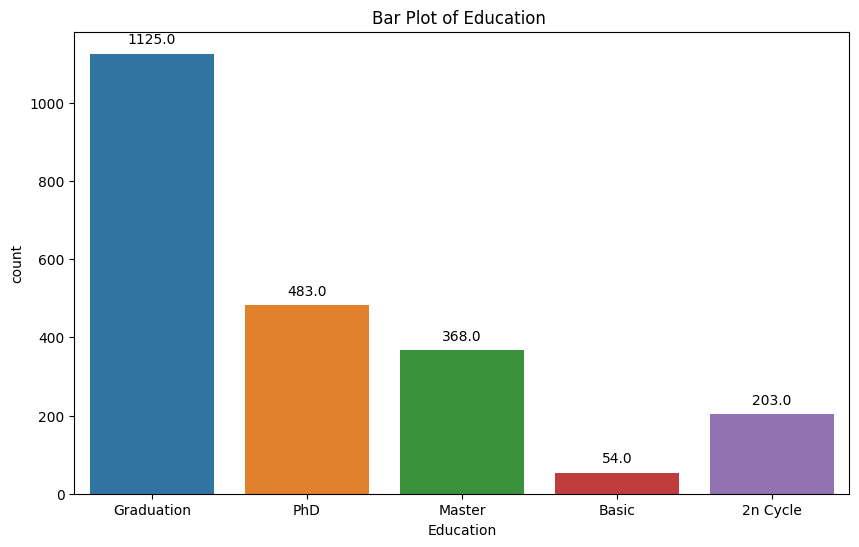

In [12]:
# BAR PLOT
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Education', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Tampilkan plot
plt.title('Bar Plot of Education ')
plt.show()

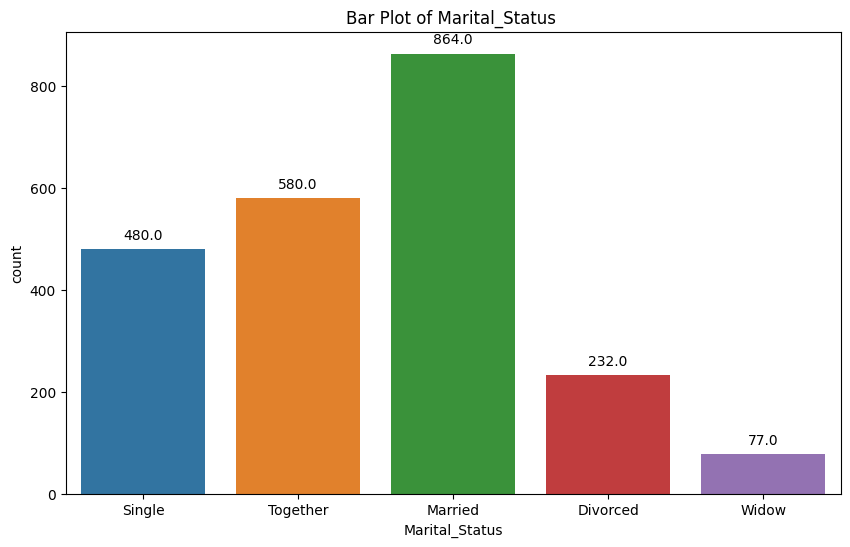

In [13]:
# BAR PLOT
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Marital_Status', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Tampilkan plot
plt.title('Bar Plot of Marital_Status ')
plt.show()

Respons show that customer accepted the offer as code of 1, whereas customer rejected the offer as code of 0

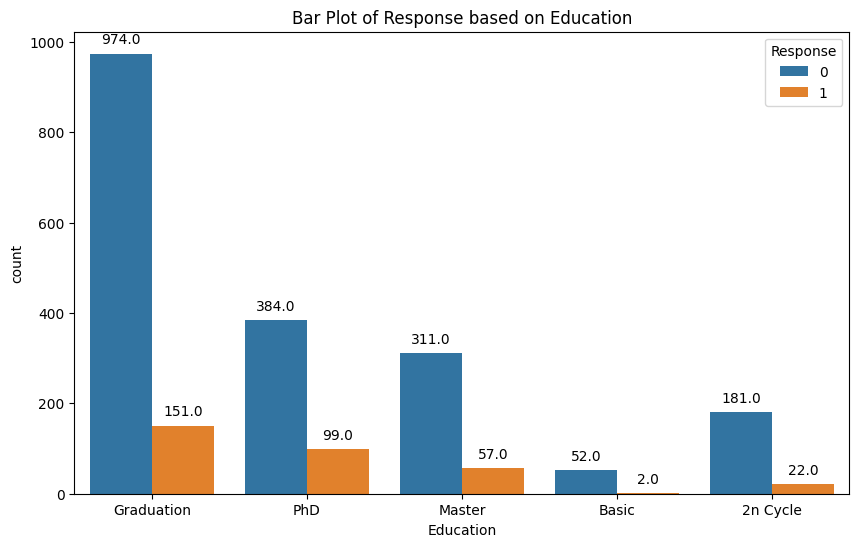

In [14]:
# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Education', hue='Response', data=df)

# Tambahkan label pada batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.title('Bar Plot of Response based on Education')
plt.show()

That plot show mostly Response = 0 or customer rejected the offer in every education

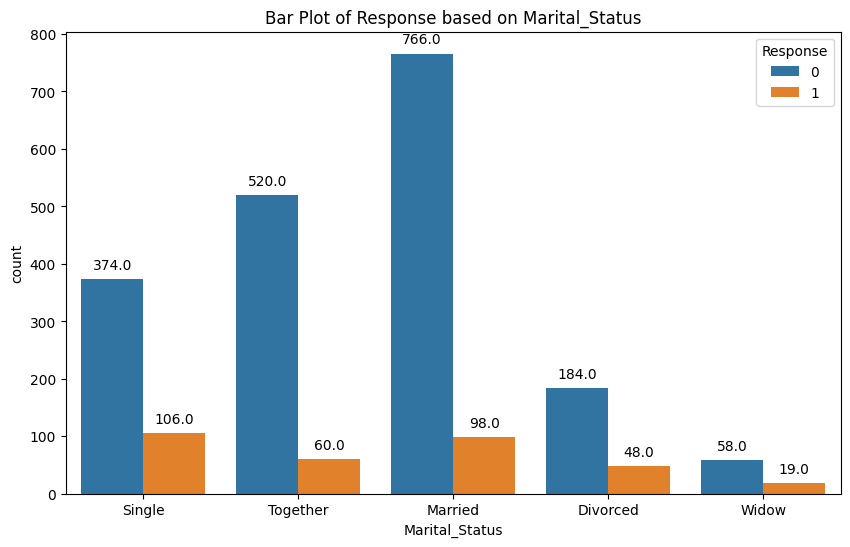

In [15]:
# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)

# Tambahkan label pada batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.title('Bar Plot of Response based on Marital_Status')
plt.show()

That plot show mostly Response = 0 or customer rejected the offer in every Marital Status

### PLOT About Numeric

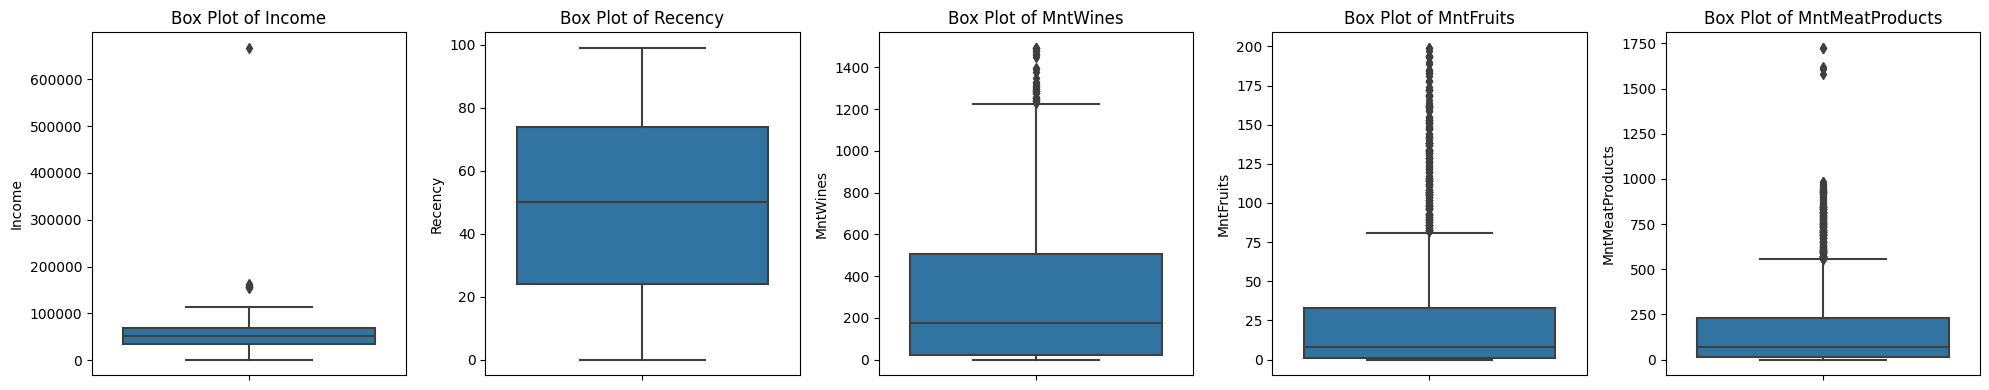

In [16]:
#Boxplot
selected_columns = df.iloc[:, 3:8]

# Create Subplot for each column
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns.columns), figsize=(20, 4))

# Create Box plot
for i, col in enumerate(selected_columns.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


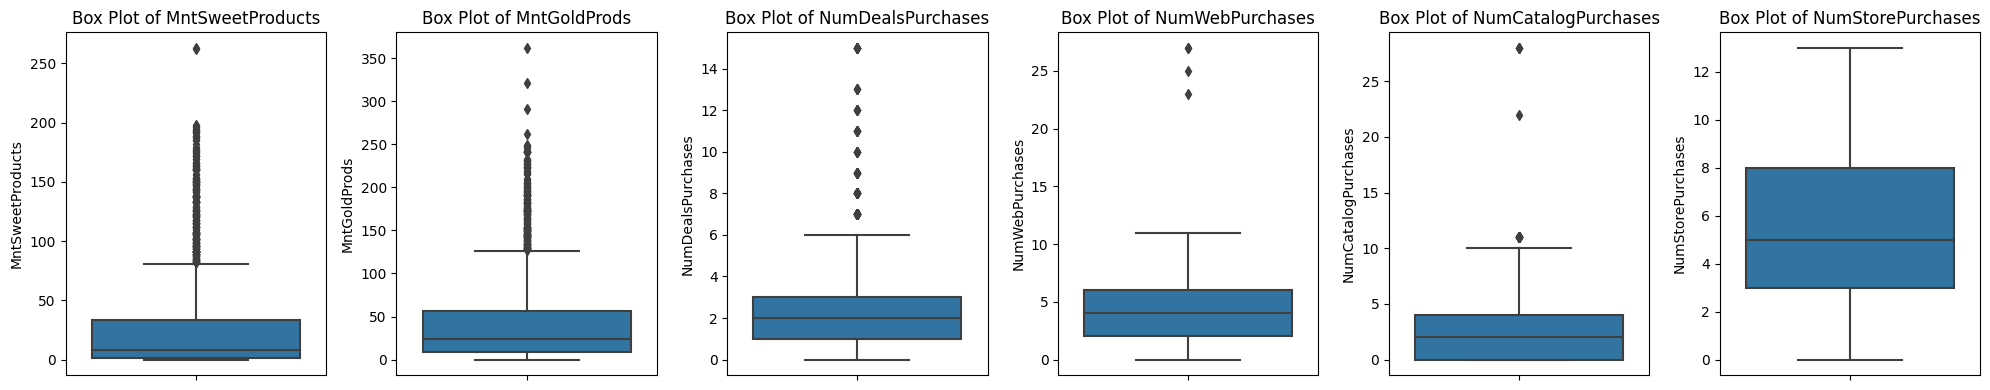

In [17]:
#Boxplot Lanjutan
selected_columns = df.iloc[:, 9:15]

# Create Subplot for each column
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns.columns), figsize=(20, 4))

# Create Box plot
for i, col in enumerate(selected_columns.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


Several boxplots consist of outliers, except for Num Store Purchases variable

<ipython-input-18-9bb1bfc0e801>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[feature_list].corr()


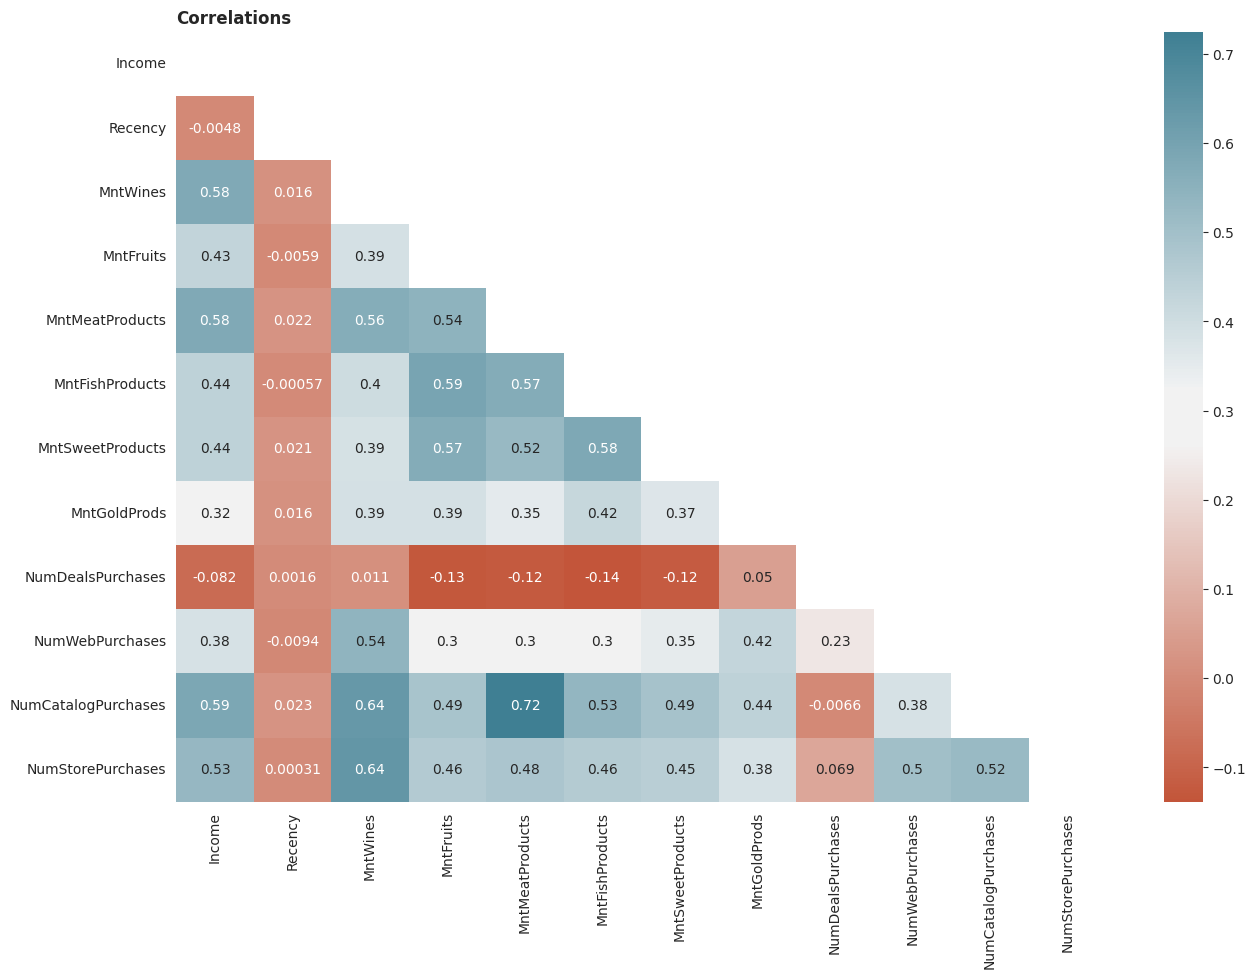

In [18]:
# mengetahui bahwa Response sebagai variabel kategori untuk dilakukan korelasi dengan variabel numerik
target = "Response"
df[target]=df[target].astype('object')
feature_list = df.select_dtypes(include=["int64", "Float64"]).columns.values
feature_list = [x for x in feature_list if not x.startswith(("ID","Year_B","AcceptedCmp"))]
feature_list.append(target)

cmap = sns.diverging_palette(20, 220, sep = 20, as_cmap=True)


corr = df[feature_list].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize = (15,10))
    sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=0, annot= True,mask=mask,square=False, cmap = cmap)
plt.title("Correlations", loc = "left", fontweight = "bold")
plt.show()

Tertinggi or highest = MntSweet Product (0,58)
Lowest atau terendah = Recency (-0,0048)

# MODEL

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Splitting Data

In [20]:
var_X = df.drop(columns=["Response",'ID','Education','Marital_Status'])
var_Y = df['Response']

## MinMaxScaler for Normalization

In [21]:
var_X = preprocessing.RobustScaler().fit(var_X).transform(var_X)

## ENCODING

In [22]:
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk variabel target
label_encoder = LabelEncoder()
var_Y_encoded = label_encoder.fit_transform(var_Y)

# CHECK BALANCE OR IMBALANCE DATA

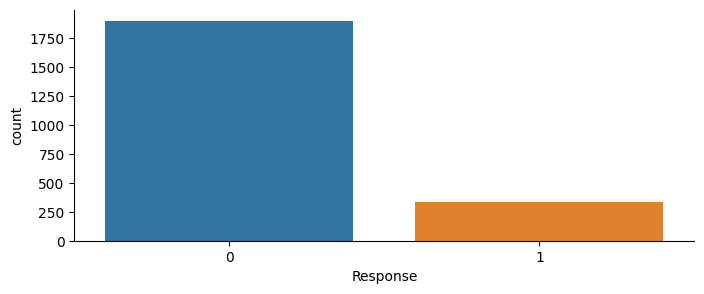

In [23]:
plt.figure(figsize=(8,3))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
ax = sns.countplot(x="Response", data=df)
plt.show()

So, do it with SMOTE because category of 0 is over sampling than category of 1

In [24]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(var_X, var_Y_encoded)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# -- HASIL
print("Jumlah data pada data train :", X_train.shape[0])
print("Jumlah data pada data test :", X_test.shape[0])

Jumlah data pada data train : 3043
Jumlah data pada data test : 761


## Finetuning Parameter

In [25]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
}
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.886295,{'n_estimators': 10}


## Prediksi With Random Forest

In [26]:
#[Random Forest]
model_RF= RandomForestClassifier(n_estimators=10)
model_RF.fit(X_train,y_train)
y_pred_RF= model_RF.predict(X_test)
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       380
           1       0.91      0.91      0.91       381

    accuracy                           0.91       761
   macro avg       0.91      0.91      0.91       761
weighted avg       0.91      0.91      0.91       761



## Hasil Prediksi

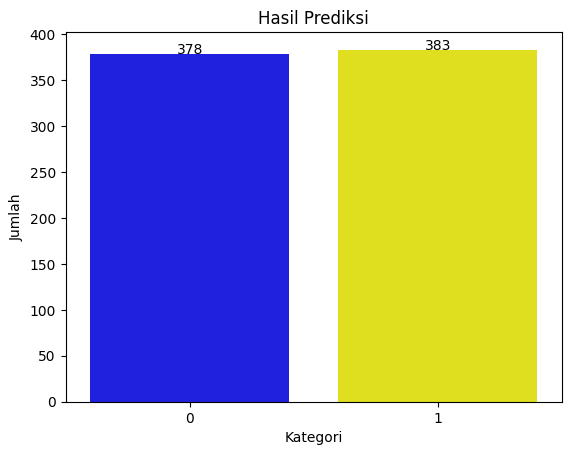

In [27]:
import matplotlib.pyplot as plt

# Menghitung jumlah kategori 0 dan 1 di y_pred_RF
jumlah_kategori_0 = np.sum(y_pred_RF == 0)
jumlah_kategori_1 = np.sum(y_pred_RF == 1)

# Menyiapkan data untuk bar chart
kategori = ['0', '1']
jumlah = [jumlah_kategori_0, jumlah_kategori_1]

# Membuat bar chart menggunakan seaborn
sns.barplot(x=kategori, y=jumlah, palette=['blue', 'yellow'])
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Hasil Prediksi')

# Menambahkan label data pada bar
for i, j in enumerate(jumlah):
    plt.text(i, j + 0.1, str(j), ha='center')

# Menampilkan chart
plt.show()
